In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1435 non-null   int64
 1   Age               1435 non-null   int64
 2   KM                1435 non-null   int64
 3   HP                1435 non-null   int64
 4   Automatic         1435 non-null   int64
 5   CC                1435 non-null   int64
 6   Doors             1435 non-null   int64
 7   Cylinders         1435 non-null   int64
 8   Gears             1435 non-null   int64
 9   Weight            1435 non-null   int64
 10  Fuel_Type_Diesel  1435 non-null   bool 
 11  Fuel_Type_Petrol  1435 non-null   bool 
dtypes: bool(2), int64(10)
memory usage: 126.1 KB


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
# Check for missing values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [ ]:
#creating dummies variables for catgorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [5]:
#finding the co relations between the columns in dataset
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


<Figure size 1000x800 with 0 Axes>

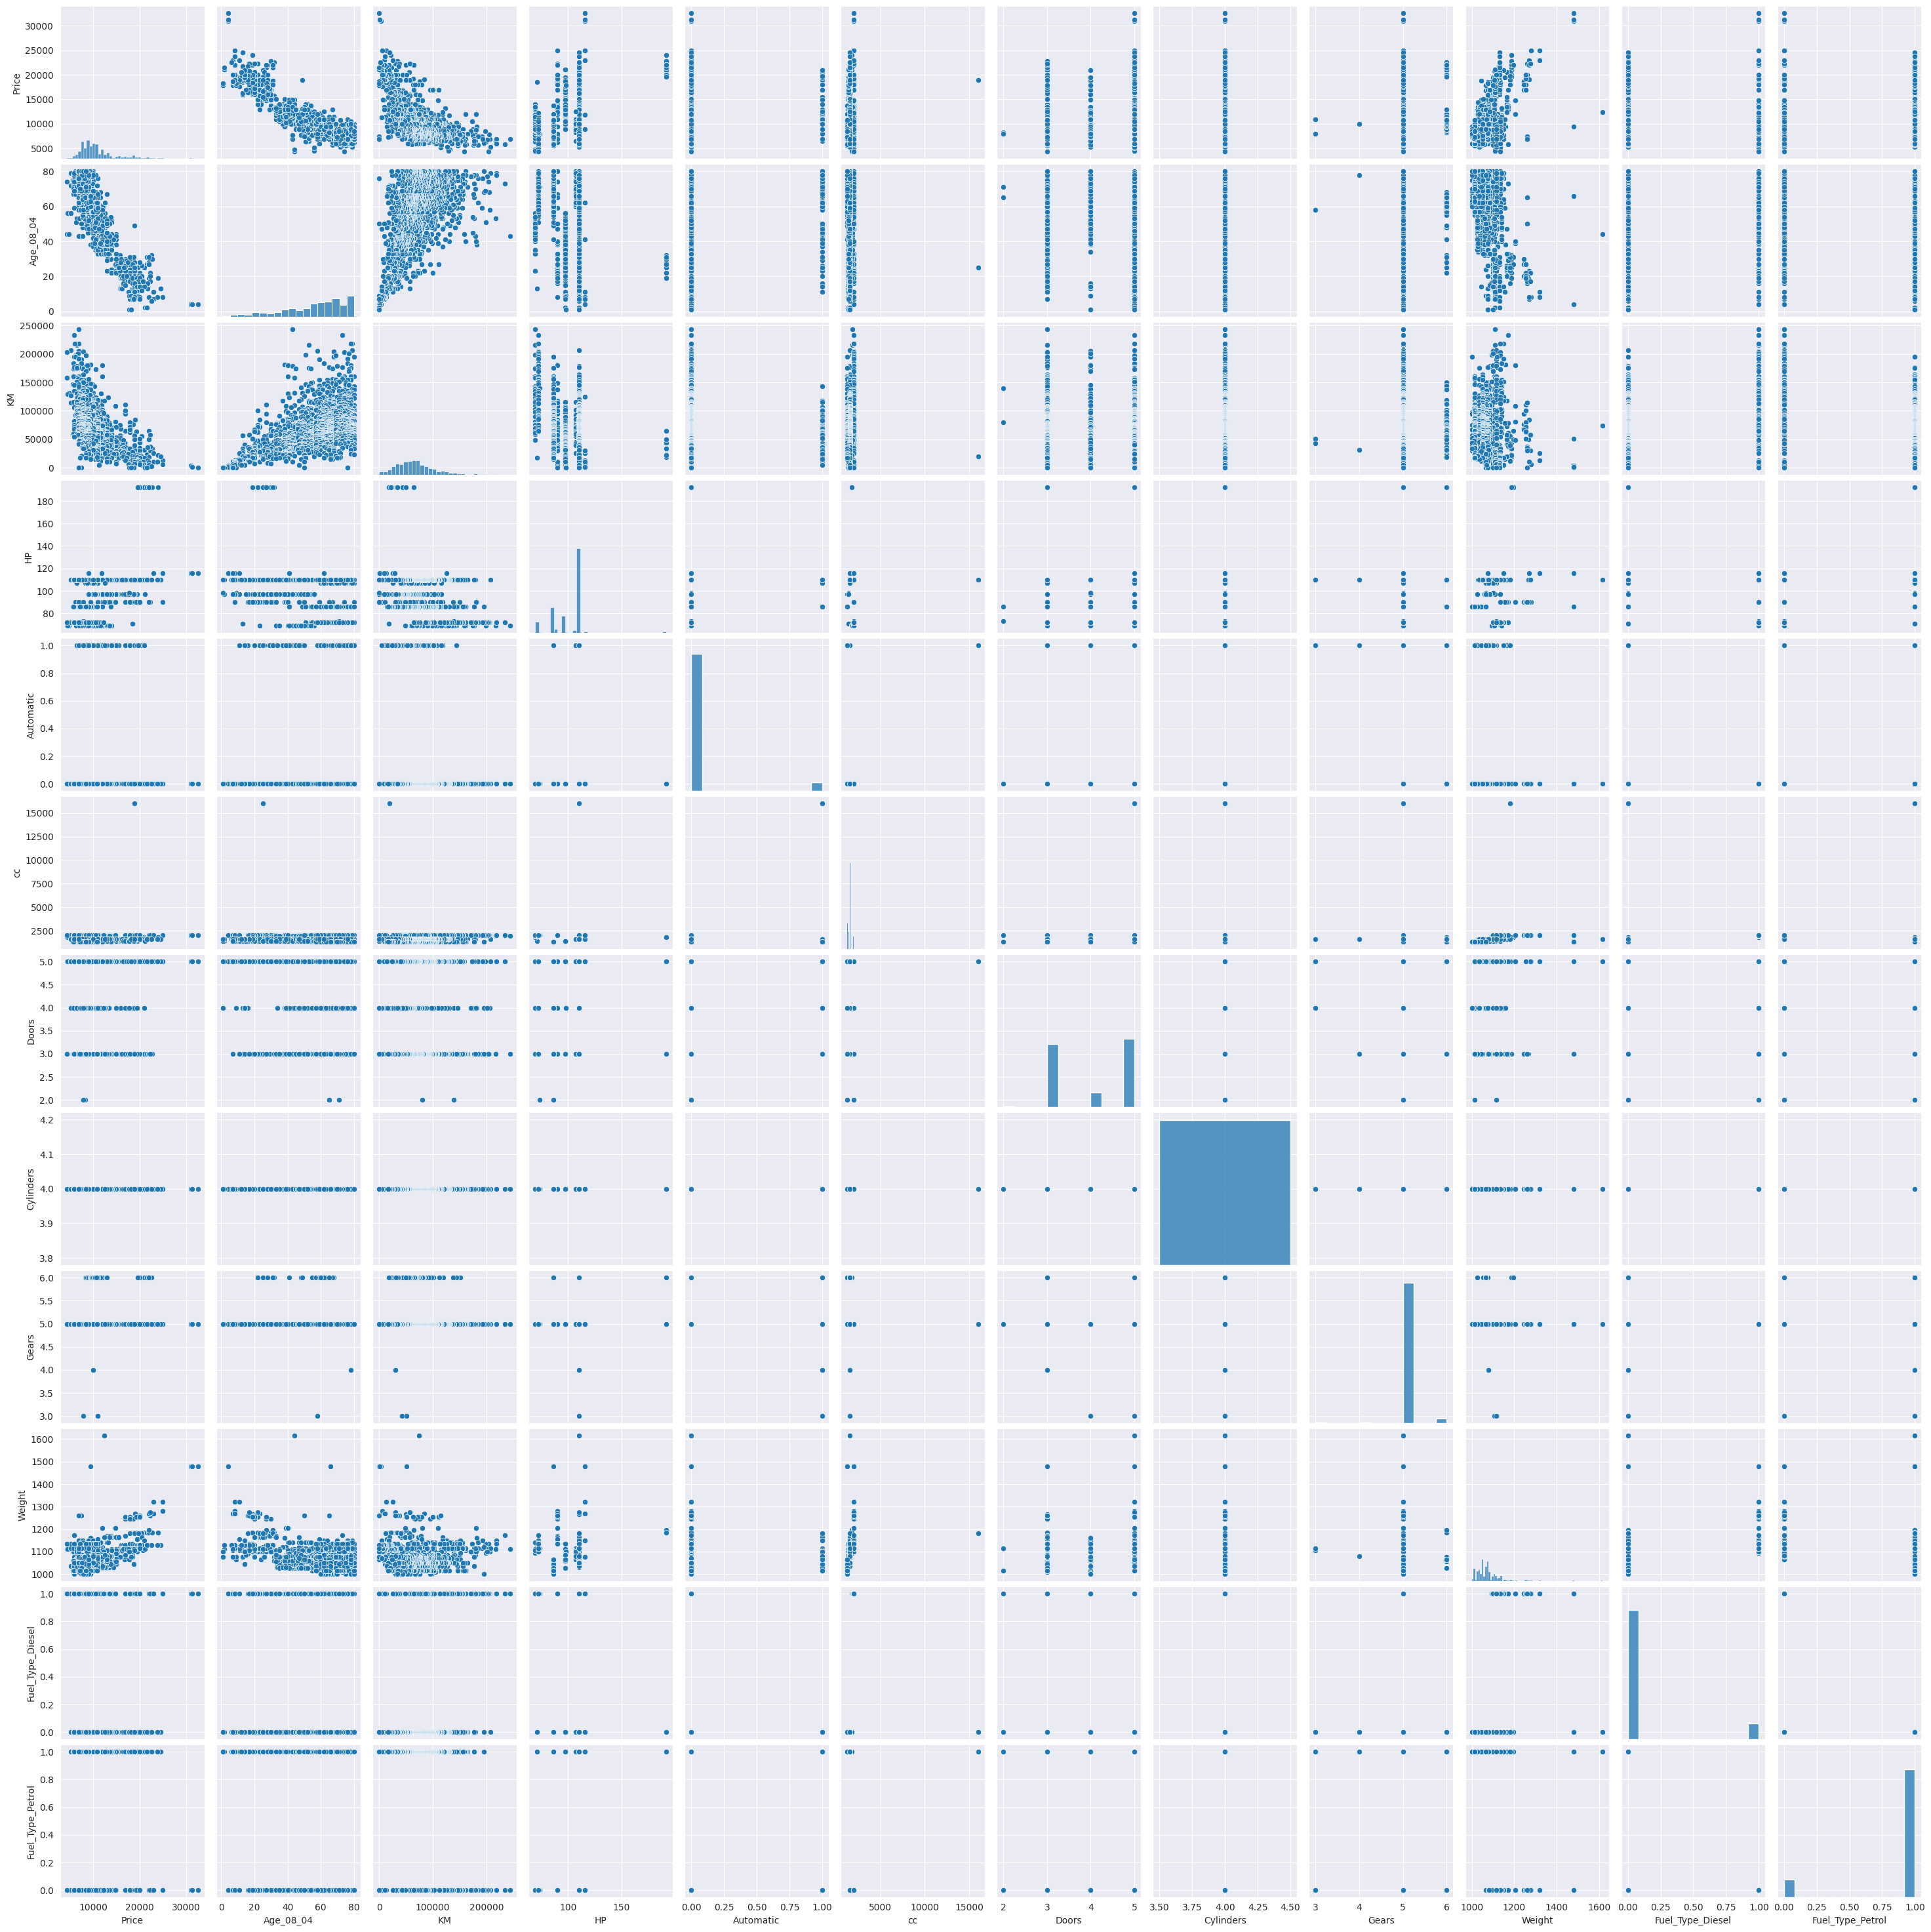

In [6]:
#visulization of the dataset as scatter plot alonge with histograms
plt.figure(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

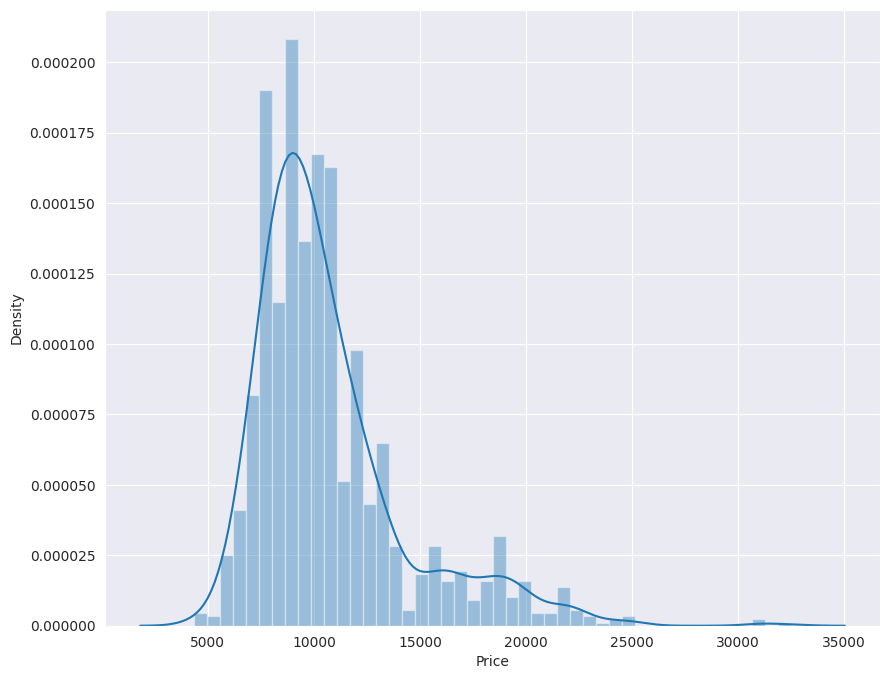

In [8]:
#visulization of the data in distribution plot
plt.figure(figsize=(10,8))
sns.set_style(style='darkgrid')
sns.distplot(df['Price'])
plt.show()

## **2.Split the dataset into training and testing sets**

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define your features (x) and target (y)
x=df[['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']]
y=df['Price']

#spliting of the the dataset into test data and training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
#print the shapes of the resulting datasets of test and train datasets
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1148, 9)
x_test shape: (288, 9)
y_train shape: (1148,)
y_test shape: (288,)


## **3.Build a multiple linear regression model using the training dataset.**

In [11]:
#importing required libraries to build regression model
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [12]:
#Building model1 for all variables in dataset
import statsmodels.formula.api as smf
model1=smf.ols('Price~Age_08_04+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1128.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:23:39   Log-Likelihood:                -12377.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -419.4055     77.460     -5.415      0.000    -571.353    -267.459
Age_08_04   -123.0844      2.636    -46.691      0.000    -128.256    -117.913
KM            -0.0195      0.001    -15.871      0.000      -0.022      -0.017
HP            28.4991      2.614     10.903      0.000      23.372      33.627
Automatic    376.3155    158.286      2.377      0.018      65.818     686.813
cc            -0.1010      0.090     -1.126      0.261      -0.277       0.075
Doors         -4.1487     40.035     -0.104      0.917     -82.682      74.384
Cylinders  -1677.6221    309.839     -5.415      0.000   -2285.410   -1069.834
Gears        670.6163    198.229      3.383      0.001     281.766    1059.467
Weight        18.6223      0.870     21.412      0.000      16.916      20.328
==============================================================================
Omnibus:                      198.860   Durbin-Watson:                   1.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1588.274
Skew:                          -0.371   Prob(JB):                         0.00
Kurtosis:                       8.099   Cond. No.                     2.00e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
#Buliding model2
model2=smf.ols('Price~Age_08_04+KM+HP+Weight',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:27:35   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
Age_08_04   -122.4245      2.623    -46.668      0.000    -127.570    -117.278
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
HP            30.2119      2.539     11.897      0.000      25.230      35.193
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Building model3 for given dataset
model3=smf.ols('Price~Age_08_04+KM+Weight+HP+Gears+KM:HP',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:27:56   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7483.3899   1315.405     -5.689      0.000   -1.01e+04   -4903.058
Age_08_04   -120.9187      2.649    -45.654      0.000    -126.114    -115.723
KM            -0.0051      0.005     -0.959      0.338      -0.015       0.005
Weight        18.0449      0.818     22.069      0.000      16.441      19.649
HP            40.1281      4.857      8.262      0.000      30.601      49.655
Gears        597.0254    193.481      3.086      0.002     217.489     976.562
KM:HP         -0.0002   5.63e-05     -2.884      0.004      -0.000   -5.19e-05
==============================================================================
Omnibus:                      189.939   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.275
Skew:                          -0.374   Prob(JB):                    1.03e-298
Kurtosis:                       7.730   Cond. No.                     2.83e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **4.Evaluate the performance of the model:**

In [18]:
# Install and upgrade scikit-learn (if necessary)
!pip install --upgrade scikit-learn

# Import necessary libraries
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the testing dataset for all three models
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

# Calculate evaluation metrics for Model 1
r2_1 = r2_score(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))  # RMSE computed manually
mae_1 = mean_absolute_error(y_test, y_pred1)

# Calculate evaluation metrics for Model 2
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
mae_2 = mean_absolute_error(y_test, y_pred2)

# Calculate evaluation metrics for Model 3
r2_3 = r2_score(y_test, y_pred3)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred3))
mae_3 = mean_absolute_error(y_test, y_pred3)

# Print the evaluation metrics for each model
print("Model 1:")
print(f"R-squared: {r2_1:.4f}")
print(f"RMSE: {rmse_1:.4f}")
print(f"MAE: {mae_1:.4f}")

print("\nModel 2:")
print(f"R-squared: {r2_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")
print(f"MAE: {mae_2:.4f}")

print("\nModel 3:")
print(f"R-squared: {r2_3:.4f}")
print(f"RMSE: {rmse_3:.4f}")
print(f"MAE: {mae_3:.4f}")


Model 1:
R-squared: 0.8547
RMSE: 1392.4388
MAE: 996.2046

Model 2:
R-squared: 0.8528
RMSE: 1401.5149
MAE: 1001.1303

Model 3:
R-squared: 0.8556
RMSE: 1388.0685
MAE: 997.1796


## **Interpretation:**

From above 3 models,model3 is the best model because R^2 is high,RMSE,MAE are low .i.e.,0.85,1388.06,997.17

Compare the evaluation metrics for each model. The model with the highest R-squared and the lowest RMSE and MAE values generally indicates better performance on the testing dataset.

## **5.Lasso and Ridge methods on the model:**

In [19]:
#import ridge regression from sklearn library
from sklearn.linear_model import Ridge

In [20]:
#Train the model
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
y_pred1=ridge.predict(x_test)

In [21]:
#calculate mean square error
mean_squared_error_ridge=np.mean((y_pred1-y_test)**2)
print(mean_squared_error_ridge)

1970379.6468550158


In [22]:
#get ridge coefficent and print them
ridge_coefficient=pd.DataFrame()
ridge_coefficient['columns']=x_train.columns
ridge_coefficient['coefficient Estimate']=pd.Series(ridge.coef_)
print(ridge_coefficient)

     columns  coefficient Estimate
0  Age_08_04           -120.765678
1         KM             -0.019988
2         HP             27.476454
3  Automatic            363.449723
4         cc             -0.113282
5      Doors              6.787241
6  Cylinders              0.000000
7      Gears            610.535492
8     Weight             19.851382


In [23]:
#import Lasso regression from sk.Learn
from sklearn.linear_model import Lasso

#Train the model
lasso_path=Lasso(alpha=1)
lasso_path.fit(x_train,y_train)
y_pred2=lasso_path.predict(x_test)

#calculate mean squared error
mean_squared_error_lasso=np.mean((y_pred2-y_test)**2)
print("mean squared error on test set", mean_squared_error_lasso)
lasso_coefficient=pd.DataFrame()
lasso_coefficient['columns']=x_train.columns
lasso_coefficient['coefficient Estimate']=pd.Series(lasso_path.coef_)


print(lasso_coefficient)

mean squared error on test set 1970575.4102917942
     columns  coefficient Estimate
0  Age_08_04           -120.725482
1         KM             -0.020000
2         HP             27.520534
3  Automatic            348.293072
4         cc             -0.112824
5      Doors              4.775618
6  Cylinders              0.000000
7      Gears            594.307310
8     Weight             19.871330


**Interview Questions:**

1.What is Normalization & Standardization and how is it helpful?

**Normalization:**

Normalization is a scaling technique that transforms the values of numerical features to a specific range, typically between 0 and 1. This process helps ensure that all features contribute equally to the model's learning process, regardless of their original scales.

=> Improves Model Performance:

=>Algorithm Compatibility:

=>Faster Convergence:

**Standardization:**

Standardization, also known as z-score normalization, transforms the data to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature and dividing by its standard deviation.

=>Handles Outliers:

=>Algorithm Compatibility:

=>Interpretability:

2.What techniques can be used to address multicollinearity in multiple linear regression?

To address the multicollinearity in mutiple lienar reression we use following techniques:

They are,

1.VIF(variance influence factor):

2.Feature Engineering:

3.Regularization technique:

1.Ridge Regression:

2.Lasso Regression:

3.Elastic Net regression(Ridge reggression+Lasso regression):